In [21]:
import pandas as pd  # Library for loading and manipulating datasets
import numpy as np  # Provides numerical tools and array support
import seaborn as sns  # Used to create statistical graphics
import matplotlib.pyplot as plt  # General-purpose plotting library

from sklearn.model_selection import train_test_split  # Utility to divide data into train/test sets
from sklearn.preprocessing import StandardScaler  # Standardizes features for ML models
from sklearn.naive_bayes import GaussianNB
# Machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, cohen_kappa_score

# To fine-tune models through parameter search
from sklearn.model_selection import GridSearchCV

# Additional classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings  # Control Python warning messages
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner notebook output

from imblearn.over_sampling import SMOTE  # Balances dataset by generating synthetic samples
df = pd.read_csv('/content/zero_day_phishing_attack.csv')
df

,URL_Length,Has_IP_Address,HTTPS_Usage,Domain_Age,Number_of_Subdomains,Special_Characters_Count,Alexa_Rank,Phishing_Label,Website_Link
0,106,1,1,107,3,3,7794,1,https://online531.com/pqvmlja5?id=9672
1,69,0,0,213,1,5,40803,1,http://online14.net/pyb7y9prm07?id=4642
2,131,1,1,39,1,2,56754,1,https://account542.co/0pue2v?id=4969
3,73,1,0,158,5,3,6350,1,http://login458.info/ohtua2x?id=6237
4,97,1,1,89,6,7,193,1,https://phish51.com/lcrg6f?id=7462
...,...,...,...,...,...,...,...,...,...
9995,92,1,0,149,3,7,37118,1,http://safe304.net/u4ac4yhagghs?id=3133
9996,18,0,0,95,3,2,31038,1,http://verify218.org/z64fhg7npij?id=8885
9997,36,0,1,146,5,2,57325,1,https://verify419.info/zhxptogqvvl?id=9689
9998,154,0,0,18,3,9,116133,1,http://online346.info/jpzh2tqsqa2n?id=3826


In [2]:
# Data Exploration
print("Dataset Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   URL_Length                10000 non-null  int64 
 1   Has_IP_Address            10000 non-null  int64 
 2   HTTPS_Usage               10000 non-null  int64 
 3   Domain_Age                10000 non-null  int64 
 4   Number_of_Subdomains      10000 non-null  int64 
 5   Special_Characters_Count  10000 non-null  int64 
 6   Alexa_Rank                10000 non-null  int64 
 7   Phishing_Label            10000 non-null  int64 
 8   Website_Link              10000 non-null  object
dtypes: int64(8), object(1)
memory usage: 703.3+ KB
Dataset Info:
 None

Summary Statistics:
         URL_Length  Has_IP_Address   HTTPS_Usage    Domain_Age  \
count  10000.00000    10000.000000  10000.000000  10000.000000   
mean      80.63650        0.494400      0.510900    118.732200   
std    

In [3]:
# Drop 'Website_Link' as it is not useful for ML models
df.drop(columns=['Website_Link'], inplace=True)  # Remove non-numeric column

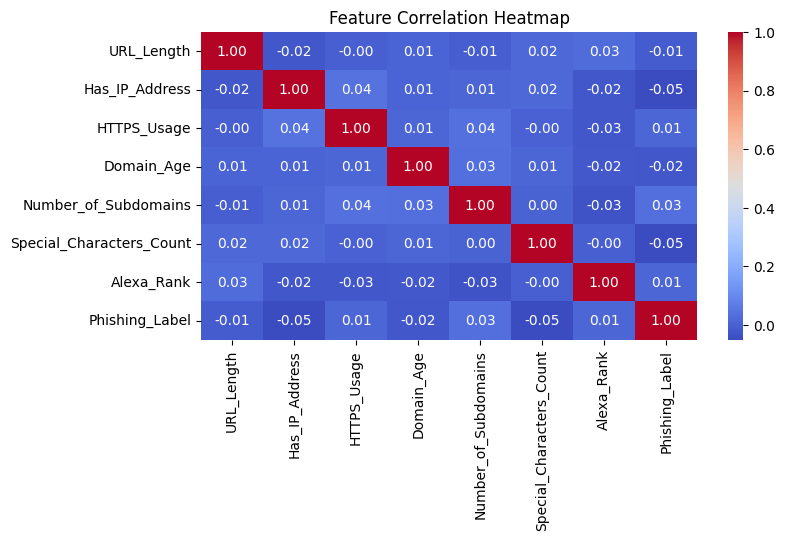

In [4]:
# Data Visualization
plt.figure(figsize=(8,4))  # Set figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Plot correlation heatmap
plt.title('Feature Correlation Heatmap')  # Add title
plt.show()  # Display plot

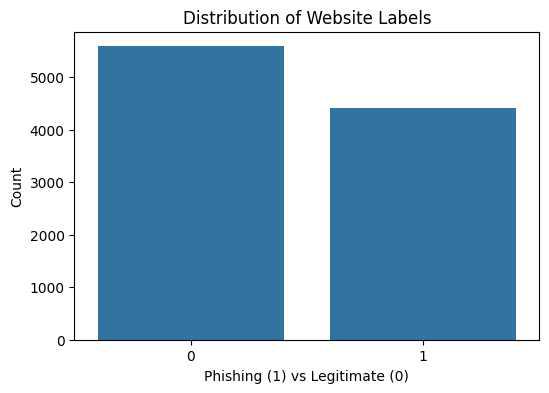

In [6]:
# Bar plot: Distribution of phishing vs. legitimate sites
plt.figure(figsize=(6,4))
sns.countplot(x='Phishing_Label', data=df)
plt.title("Distribution of Website Labels")
plt.xlabel("Phishing (1) vs Legitimate (0)")
plt.ylabel("Count")
plt.show()

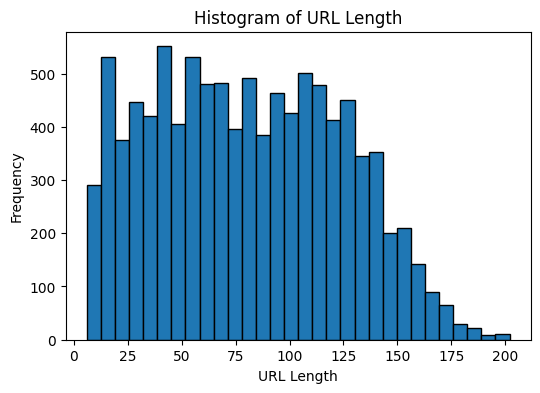

In [7]:
# Histogram: URL Length
plt.figure(figsize=(6,4))
plt.hist(df['URL_Length'], bins=30, edgecolor='black')
plt.title("Histogram of URL Length")
plt.xlabel("URL Length")
plt.ylabel("Frequency")
plt.show()

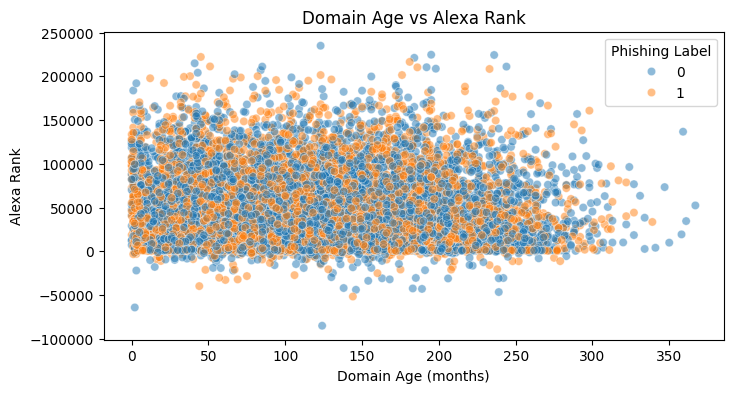

In [9]:
# Scatter plot: Domain Age vs Alexa Rank colored by label
plt.figure(figsize=(8,4))
sns.scatterplot(x='Domain_Age', y='Alexa_Rank', hue='Phishing_Label', data=df, alpha=0.5)
plt.title("Domain Age vs Alexa Rank")
plt.xlabel("Domain Age (months)")
plt.ylabel("Alexa Rank")
plt.legend(title="Phishing Label")
plt.show()


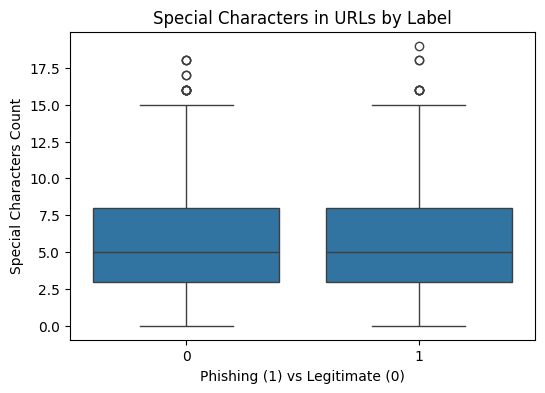

In [11]:
# Boxplot: Special Characters Count by Label
plt.figure(figsize=(6,4))
sns.boxplot(x='Phishing_Label', y='Special_Characters_Count', data=df)
plt.title("Special Characters in URLs by Label")
plt.xlabel("Phishing (1) vs Legitimate (0)")
plt.ylabel("Special Characters Count")
plt.show()

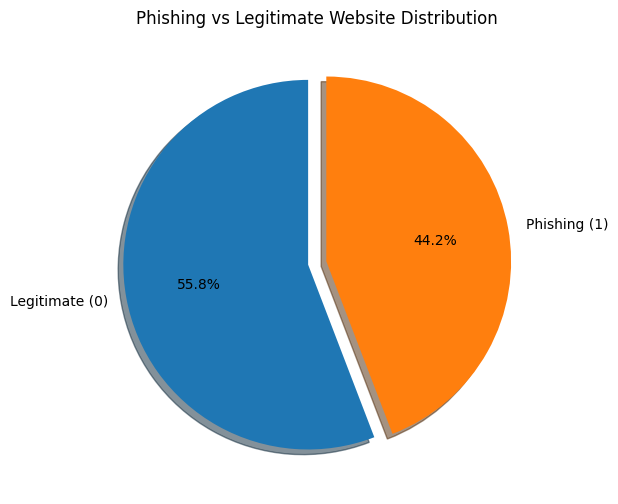

In [12]:
# Count phishing vs. legitimate
label_counts = df["Phishing_Label"].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    label_counts,
    labels=["Legitimate (0)", "Phishing (1)"],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    explode=(0.05, 0.05)
)
plt.title("Phishing vs Legitimate Website Distribution")
plt.show()

In [13]:
# Splitting features and labels
X = df.drop(columns=['Phishing_Label'])  # Features (independent variables)
y = df['Phishing_Label']  # Target variable (dependent variable)

In [14]:
# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)  # Resample the dataset
print("\nClass distribution after SMOTE:\n", y_resampled.value_counts())  # Display new class distribution

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)  # 80-20 split


Class distribution after SMOTE:
 Phishing_Label
1    5583
0    5583
Name: count, dtype: int64


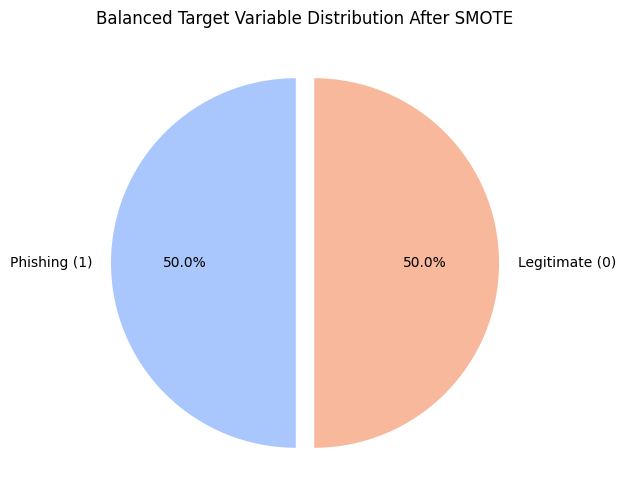

In [15]:
# Count the resampled labels
label_counts = pd.Series(y_resampled).value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(
    label_counts,
    labels=label_counts.index.map({0: "Legitimate (0)", 1: "Phishing (1)"}),
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0.05),
    colors=sns.color_palette("coolwarm", 2)
)
plt.title("Balanced Target Variable Distribution After SMOTE")
plt.show()

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)  # 80-20 split

# Feature Scaling
scaler = StandardScaler()  # Initialize standard scaler
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)  # Transform test data


Confusion Matrix:
 [[617 514]
 [477 626]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.55      0.55      1131
           1       0.55      0.57      0.56      1103

    accuracy                           0.56      2234
   macro avg       0.56      0.56      0.56      2234
weighted avg       0.56      0.56      0.56      2234


Cohen's Kappa Score: 0.11303105501473953


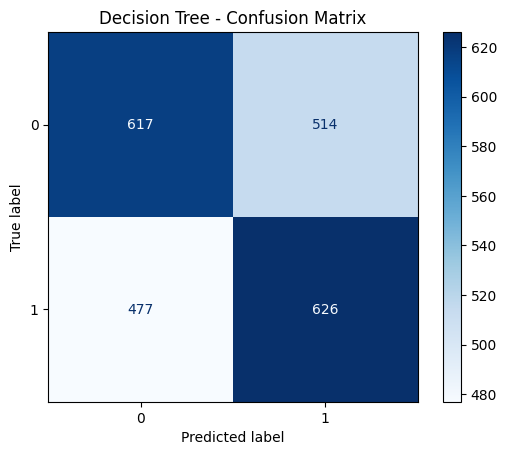

In [18]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred_dt)
print("\nCohen's Kappa Score:", kappa)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

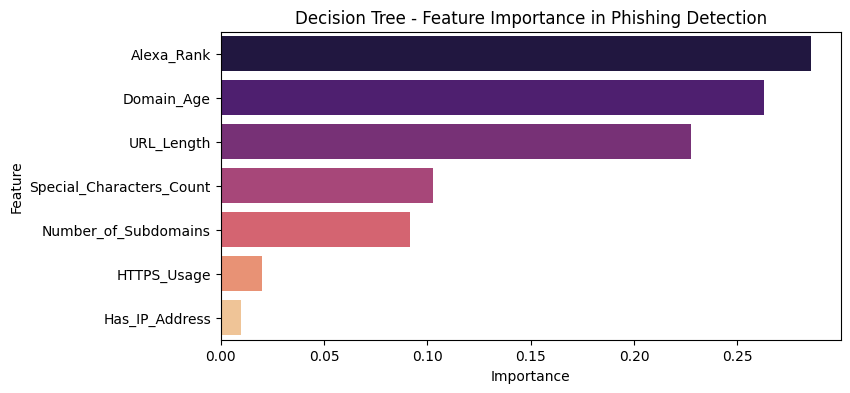

In [19]:
# Feature Importance using Decision Tree
feature_importance = dt_model.feature_importances_  # Extract importance values
features = X.columns  # Feature names

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title('Decision Tree - Feature Importance in Phishing Detection')
plt.show()


Best Hyperparameters for Naive Bayes: {'var_smoothing': 1e-09}

Confusion Matrix for Naive Bayes:
 [[606 525]
 [446 657]]

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.58      0.54      0.56      1131
           1       0.56      0.60      0.58      1103

    accuracy                           0.57      2234
   macro avg       0.57      0.57      0.57      2234
weighted avg       0.57      0.57      0.57      2234


Cohen's Kappa Score for Naive Bayes: 0.13134080677623472


<Figure size 600x400 with 0 Axes>

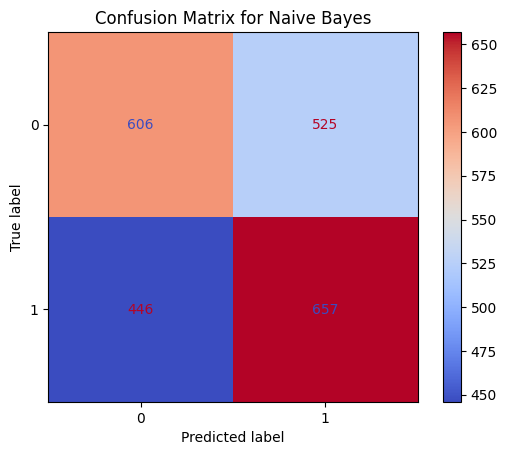

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Hyperparameter grid for Gaussian Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter to handle zero variance
}

# Initialize Gaussian Naive Bayes model
nb = GaussianNB()

# Grid search to find the best hyperparameters
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

# Display best hyperparameters found by grid search
print("\nBest Hyperparameters for Naive Bayes:", grid_search_nb.best_params_)

# Train the best model with the selected hyperparameters
best_model_nb = grid_search_nb.best_estimator_
best_model_nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = best_model_nb.predict(X_test)

# Evaluation: Display Confusion Matrix
print("\nConfusion Matrix for Naive Bayes:\n", confusion_matrix(y_test, y_pred_nb))

# Display Classification Report
print("\nClassification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))

# Calculate and display Cohen's Kappa score
kappa_nb = cohen_kappa_score(y_test, y_pred_nb)
print("\nCohen's Kappa Score for Naive Bayes:", kappa_nb)

# Plot the confusion matrix for better visualization
plt.figure(figsize=(6, 4))
disp_nb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_nb))
disp_nb.plot(cmap='coolwarm')
plt.title("Confusion Matrix for Naive Bayes")
plt.show()



Best Hyperparameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Confusion Matrix for Logistic Regression:
 [[615 516]
 [468 635]]

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.57      0.54      0.56      1131
           1       0.55      0.58      0.56      1103

    accuracy                           0.56      2234
   macro avg       0.56      0.56      0.56      2234
weighted avg       0.56      0.56      0.56      2234


Cohen's Kappa Score for Logistic Regression: 0.1194048863731958


<Figure size 600x400 with 0 Axes>

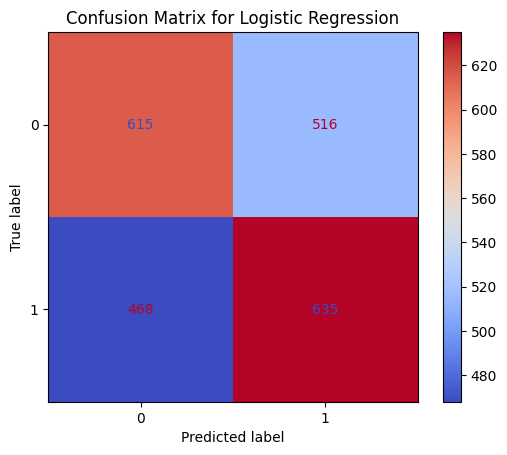

In [25]:
# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength; higher values reduce regularization
    'penalty': ['l2'],  # Regularization type, we are using L2 regularization
    'solver': ['liblinear', 'lbfgs']  # Solver options for optimization
}

# Initialize Logistic Regression model
lr = LogisticRegression(random_state=42)

# Grid search to find the best hyperparameters
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Display best hyperparameters found by grid search
print("\nBest Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)

# Train the best model with the selected hyperparameters
best_model_lr = grid_search_lr.best_estimator_
best_model_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = best_model_lr.predict(X_test)

# Evaluation: Display Confusion Matrix
print("\nConfusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))
# Display Classification Report (precision, recall, f1-score, etc.)
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Calculate and display Cohen's Kappa score
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)
print("\nCohen's Kappa Score for Logistic Regression:", kappa_lr)

# Plot the confusion matrix for better visualization
plt.figure(figsize=(6, 4))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr))
disp_lr.plot(cmap='coolwarm')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


Best Hyperparameters for SVM: {'C': 1, 'degree': 2, 'gamma': 'scale'}

Confusion Matrix for SVM:
 [[644 487]
 [412 691]]

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.61      0.57      0.59      1131
           1       0.59      0.63      0.61      1103

    accuracy                           0.60      2234
   macro avg       0.60      0.60      0.60      2234
weighted avg       0.60      0.60      0.60      2234


Cohen's Kappa Score for SVM: 0.19571612671730165


<Figure size 600x400 with 0 Axes>

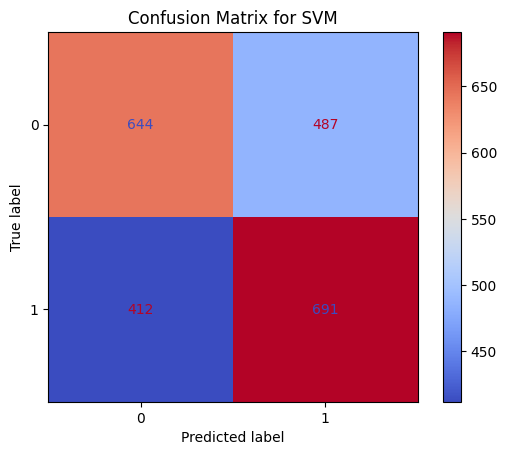

In [26]:
# Expanded hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1],          # Wider range of regularization parameters
    'gamma': ['scale', 'auto', 0.001],  # More options for kernel coefficient
    'degree': [2, 3]  # Only relevant for 'poly' kernel
}

# Initialize Support Vector Machine (SVM) model
svm = SVC(random_state=42)

# Grid search to find the best hyperparameters
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Display best hyperparameters found by grid search
print("\nBest Hyperparameters for SVM:", grid_search_svm.best_params_)

# Train the best model with the selected hyperparameters
best_model_svm = grid_search_svm.best_estimator_
best_model_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = best_model_svm.predict(X_test)

# Evaluation: Display Confusion Matrix
print("\nConfusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))
# Display Classification Report
print("\nClassification Report for SVM:\n", classification_report(y_test, y_pred_svm))

# Calculate and display Cohen's Kappa score
kappa_svm = cohen_kappa_score(y_test, y_pred_svm)
print("\nCohen's Kappa Score for SVM:", kappa_svm)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
disp_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svm))
disp_svm.plot(cmap='coolwarm')
plt.title("Confusion Matrix for SVM")
plt.show()

In [27]:
import joblib  # For saving models

# Save Gaussian Naive Bayes model
joblib.dump(best_model_nb, 'best_naive_bayes_model.pkl')

# Save Logistic Regression model
joblib.dump(best_model_lr, 'best_logistic_regression_model.pkl')

# Save SVM model
joblib.dump(best_model_svm, 'best_svm_model.pkl')

print("\nAll models have been saved successfully!")


All models have been saved successfully!


## Logging Info

In [28]:
import logging

# Configure logging
logging.basicConfig(
    level=logging.INFO,  # Set the minimum log level (DEBUG, INFO, WARNING, ERROR, CRITICAL)
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
    handlers=[
        logging.FileHandler("model_training.log"),  # Log to a file
        logging.StreamHandler()  # Also output logs to console
    ]
)


In [29]:
import logging

# Log best hyperparameters for SVM
logging.info(f"Best Hyperparameters for SVM: {grid_search_svm.best_params_}")

# Log training start
logging.info("Training the best SVM model with selected hyperparameters...")

# Train the best SVM model
best_model_svm.fit(X_train, y_train)
logging.info("SVM model training completed.")

# Make predictions
y_pred_svm = best_model_svm.predict(X_test)
logging.info("Predictions on test data completed.")

# Evaluation
cm = confusion_matrix(y_test, y_pred_svm)
cr = classification_report(y_test, y_pred_svm)
kappa = cohen_kappa_score(y_test, y_pred_svm)

logging.info(f"Confusion Matrix for SVM:\n{cm}")
logging.info(f"Classification Report for SVM:\n{cr}")
logging.info(f"Cohen's Kappa Score for SVM: {kappa}")



##(a)Phishing Detection System Prototype: A working software prototype integrating host file mapping and AI-based URL checking for real-time phishing detection.

In [30]:
pip install tensorflow


In [31]:
pip install keras


In [32]:
# Data manipulation and numerical computations
import pandas as pd  # For handling datasets, reading CSV/Excel files, and DataFrame operations
import numpy as np   # For numerical operations, arrays, and mathematical computations

# Hashing utility
import hashlib  # Provides secure hash and message digest algorithms, useful for hashing data

# Text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
# Converts a collection of text documents into a matrix of TF-IDF features

# Train-test splitting
from sklearn.model_selection import train_test_split
# For splitting the dataset into training and testing sets

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
# Random Forest classifier for supervised learning tasks

# Model evaluation
from sklearn.metrics import classification_report
# To generate metrics like precision, recall, f1-score, and support

# Natural language processing utilities
import nltk  # Natural Language Toolkit, widely used for NLP tasks
from nltk.util import ngrams
# For generating n-grams (sequences of n words) from text

# Label encoding for categorical targets
from sklearn.preprocessing import LabelEncoder
# Converts categorical labels into numeric form

# Deep learning utilities for text
from tensorflow.keras.preprocessing.text import Tokenizer
# For converting text to sequences of integers (tokenization)
from tensorflow.keras.preprocessing.sequence import pad_sequences
# For padding sequences to the same length

# Deep learning models
from tensorflow.keras.models import Sequential
# Sequential model API for stacking layers linearly

# Neural network layers
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout

In [33]:
data = pd.read_csv('/content/url_dataset.csv')
data

,URL,Label
0,https://google.com,0
1,https://facebook.com,0
2,https://twitter.com,0
3,https://linkedin.com,0
4,https://github.com,0
5,https://stackoverflow.com,0
6,https://microsoft.com,0
7,https://apple.com,0
8,https://yahoo.com,0
9,https://bing.com,0


In [34]:
import hashlib
from sklearn.feature_extraction.text import CountVectorizer

# Feature engineering: Hash-based character mapping
# Alternate: Using hashlib with a lambda function directly
data['hashed_url'] = data['URL'].map(lambda x: hashlib.sha256(str(x).encode('utf-8')).hexdigest())

#  Tokenization and n-grams feature extraction
# Alternate: Using CountVectorizer to generate n-grams
def get_ngrams(text, n=3):
    # Use CountVectorizer to generate n-grams
    vectorizer = CountVectorizer(ngram_range=(n, n), token_pattern=r'\b\w+\b')
    ngram_matrix = vectorizer.fit_transform([text])
    return list(vectorizer.get_feature_names_out())

data['url_ngrams'] = data['URL'].apply(lambda x: get_ngrams(str(x), n=3))

#  Preprocess URLs
# Alternate: Using regex for http/https removal
import re

def clean_url(url):
    url = re.sub(r'^https?://', '', url)  # Remove http:// or https:// at the start
    return url

data['preprocessed_url'] = data['URL'].apply(lambda x: clean_url(str(x)))

In [38]:
# -------------------------------
def generate_ngrams(text, n=3):
    words = str(text).split()  # Ensure the input is a string
    ngram_list = list(ngrams(words, n))
    return [' '.join(gram) for gram in ngram_list]
# Feature Engineering: 3-grams from URLs
# -------------------------------
data['url_ngrams'] = data['URL'].apply(lambda x: generate_ngrams(x, n=3))
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# -------------------------------
# Tokenization and Padding
# -------------------------------
nltk.download('punkt')

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['URL'])

sequences = tokenizer.texts_to_sequences(data['URL'])
X_padded = pad_sequences(sequences, padding='post')

# Prepare labels
y = data['Label'].values

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# -------------------------------
# Model 1: Gradient Boosting Classifier
# -------------------------------
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and evaluation
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))

# -------------------------------
# Model 2: 1D CNN for URL Classification
# -------------------------------
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                        output_dim=100,
                        input_length=X_train.shape[1]))
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate CNN
cnn_pred = (cnn_model.predict(X_test) > 0.5).astype(int)
print("\n1D CNN Model Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, cnn_pred))
print("Classification Report:\n", classification_report(y_test, cnn_pred))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Gradient Boosting Classifier Results:
Confusion Matrix:
 [[3 0]
 [0 7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.4521 - loss: 0.6955 - val_accuracy: 0.4000 - val_loss: 0.6838
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6958 - loss: 0.6586 - val_accuracy: 0.5000 - val_loss: 0.6698
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7271 - loss: 0.6195 - val_accuracy: 0.5000 - val_loss: 0.6530
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8208 - loss: 0.5875 - val_accuracy: 0.8000 - val_loss: 0.6298
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9458 - loss: 0.556

In [39]:
# -------------------------------
# Evaluate Gradient Boosting model
# -------------------------------
print("Gradient Boosting Classification Report:")
gb_pred = gb_model.predict(X_test)
print(classification_report(y_test, gb_pred))

# -------------------------------
# Evaluate 1D CNN model
# -------------------------------
cnn_pred = (cnn_model.predict(X_test) > 0.5).astype(int)
print("1D CNN Model Classification Report:")
print(classification_report(y_test, cnn_pred))

# -------------------------------
# Example of phishing detection using 1D CNN
# -------------------------------
def detect_phishing(url):
    # Convert URL to sequence
    seq = tokenizer.texts_to_sequences([url])
    # Pad sequence to match model input length
    padded_seq = pad_sequences(seq, maxlen=X_train.shape[1], padding='post')
    # Predict using CNN model
    prediction = cnn_model.predict(padded_seq)
    return "Phishing" if prediction > 0.5 else "Legitimate"

# -------------------------------
# Test with new URLs
# -------------------------------
test_urls = [
    "http://secure-payment-portal.com",
    "https://amazon.com",
    "http://paypal-account-update.com"
]

for url in test_urls:
    print(f"URL: {url} => Prediction: {detect_phishing(url)}")

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1D CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
URL: http://secure-payment-portal.com => Prediction: Legitimate
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
URL: https://amazon.com => Prediction: Legitimate
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
UR